<h1>Visual Search Engines: Final Project</h1>
<p>
After several weeks of hard labor on implementing image thresholding, convolutions, bag-of-words histograms, nearest neighbour classifiers, and average precision scores, we have arrived at the final project.
<br>
In this final project, we will combine all the lessons we've learned into a real-world application!
<br>
<br>
<strong>Note: Also download the Animal Dataset from Piazza to make everything work.</strong>
<br>
<br>
<strong>The goal of the project:</strong> Automatically classify images of animals.
<br>
In this project, you are given 1000 train images and 200 validation images from 10 animal categories. Using these images, the goal is to correctly classify 500 test images.
<br>
The 10 animal categories: "blue whale", "chihuahua", "chimpanzee", "fox", "gorilla", "killer whale", "seal", "tiger", "wolf", zebra".
<br>
An example image of each animal:
<br>
</p>
<img src="dataset/trainset/blue+whale/blue+whale_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/chihuahua/chihuahua_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/chimpanzee/chimpanzee_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/fox/fox_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/gorilla/gorilla_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/killer+whale/killer+whale_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/seal/seal_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/tiger/tiger_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/wolf/wolf_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>
<img src="dataset/trainset/zebra/zebra_0001.jpg" style="width: 8.5%; float: left; margin-right: 1%"/>

As you can see from the above examples, this classification problem is quite tricky, as the images are of different size and do not always cleanly show each animal. Look for example at the blue whale and the seal examples. For the blue whale image, only the tail is visible, while for the seal image, you get to see multiple seals.
<br>
<br>
<strong>So, how are we going to tackle this problem?</strong>
<br>
We will use the pipeline we have created to make a representation of each image that can be used for classification! During the last weeks, we have built a image classification pipeline step-by-step, containing the following elements:
<ol>
<li> Extract local features from images.</li>
<li> Cluster local features using k-means to get a codebook.</li>
<li> For an image, compute the bag-of-words histogram using the clustered codebook.</li>
<li> Given a bag-of-words histogram representation, classify test images using your favorite classifier.</li>
</ol>
<br>
<br>
In this final project, we will move the lessons we've learned into a real-world challenge. We will extract SIFT features from the animal images, create (big) bag-of-words histograms, and classify 500 images!
<br>
<br>
To make it even more interesting, we will make this project into a challenge by making a public leaderboard. That way, you can find out who has the best classification scores and you can compare numbers.

<h3>Phase 0: Creating an account for the leaderboard</h3>
For the public leaderboard, we will use "Kaggle in Class", which is a very helpful site for performing such challenges. In order to compete, go to the Kaggle website (at kaggle.com) and create an account (1 per group). We will hand out a link so you can be part of the competition.
<br>
<br>
For using the leaderboard, all you have to do is upload a file containing your predictions for each of the 500 test images. That file will be generated at the end of the notebook.

<h3>Phase 1: Extracting SIFT features from images</h3>
In order to perform the classification, we need solid local features. Here, we use SIFT features, for which the Python code has been provided by former course lecturer dr. Jan van Gemert (currently Assistent Professor at Delft University of Technology).<br>
The code for SIFT in Python is in the folder pySift. The code provides 3 ways of extracting locations from images, namely dense sampling (extract a location from a grid), hessian interest points and harris interest points. Below, you can see the code for finding the locations:

(300, 416, 3)


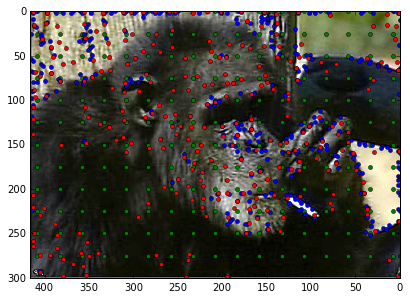

In [1]:
# Import the pySIFT code.
import sys
sys.path.append("pySift")
from pySift import sift, matching

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import time
from collections import Counter
import time
import pylab as plt
from IPython import display
import pickle

# Use an example image.
imagename = "dataset/trainset/chimpanzee/chimpanzee_0097.jpg"

# Example for dense sampling.
densepoints = sift.densePoints(imagename, stride=25)

# Example for hessian interest points.
sigma       = 1.0
hespoints   = sift.computeHes(imagename, sigma, magThreshold=15, hesThreshold=10, NMSneighborhood=10)

# Example for harris interest points.
harpoints   = sift.computeHar(imagename, sigma, magThreshold=5, NMSneighborhood=10)

# Plot the points!
image = mpimg.imread(imagename)
print image.shape

plt.imshow(image)
plt.plot(densepoints[:,0], densepoints[:,1], 'go', ms=4)
plt.plot(hespoints[:,0], hespoints[:,1], 'bo', ms=4)
plt.plot(harpoints[:,0], harpoints[:,1], 'ro', ms=4)
plt.tight_layout()
plt.xlim([image.shape[1],0])
plt.ylim([image.shape[0],0])
plt.show()

As you can see from the example above, each method finds other points to focus on. For this final project, you are free to choose the method AND you are free to select the parameters. In fact, it will be wise to change parameters for the best performance. Naturally, we want you to explain your choices and your parameters in the report.
<br>
<br>
Alternatively, it is also possible to combine the point detectors. The code below shows how to combine them. It also shows how to get the actual SIFT features:

In [2]:
# Combine the point detectors.

# Print the number of points per method.
print densepoints.shape, hespoints.shape, harpoints.shape
# Combine the points.
allpoints = np.concatenate((densepoints, hespoints, harpoints))
print allpoints.shape
print type(allpoints)
# Compute the SIFT features from different point sets.
point1, sift1 = sift.computeSIFTofPoints(imagename, densepoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)
point2, sift2 = sift.computeSIFTofPoints(imagename, allpoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)

print
print point1.shape, sift1.shape
print point2.shape, sift2.shape

(204, 2) (338, 2) (275, 2)
(817, 2)
<type 'numpy.ndarray'>

(165, 2) (165, 128)
(596, 2) (596, 128)


pySift/pySift/sift.py:187: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  feats[:,:,idx:nrOrientBins+idx] = aggAng[rBegin:rEnd, cBegin:cEnd, :]


As you can see from the above piece of code, it is quite easy to get SIFT features. Simply get some points and call the SIFT function.
<br>
<strong>Note that the SIFT function throws away some point that can not be used for SIFT (e.g. on the edge of the image).</strong>

<h3>Helpful Side Comment: Saving and Loading</h3>
<p>
Some of your experiments in the following sections may take a long time to compute. It can be helpful, therefore, to save variables to disk so that you can load them later instead of re-calculating them. Below is a simple example to write an array to a file and then load it from that file. It would be wise to consider doing this for anything that takes a long time to calculate, and which you're likely to re-use.

In [3]:
#Simple test array:
test_array = np.random.rand(6,6)
print "Test array:\n",test_array
#Save array in a file:
np.save('test_filename.npy',test_array)

#Now we try loading the file:
loaded_array = np.load('test_filename.npy')
print "\nLoaded array:\n",loaded_array
#And check that it's the same as the one we saved
print '\nThe arrays are equal:', np.all(loaded_array == test_array)

Test array:
[[ 0.78530041  0.16169889  0.94864984  0.70754009  0.44761936  0.2078111 ]
 [ 0.25618292  0.1829819   0.37878959  0.33300838  0.24914927  0.97555085]
 [ 0.91333133  0.62354467  0.65393722  0.0197397   0.75596658  0.51893751]
 [ 0.259133    0.78748835  0.99400459  0.65038369  0.02164504  0.43903026]
 [ 0.41811032  0.39836817  0.89594897  0.48495961  0.72100091  0.23373614]
 [ 0.9925306   0.03213224  0.34942014  0.86992682  0.19349142  0.70989568]]

Loaded array:
[[ 0.78530041  0.16169889  0.94864984  0.70754009  0.44761936  0.2078111 ]
 [ 0.25618292  0.1829819   0.37878959  0.33300838  0.24914927  0.97555085]
 [ 0.91333133  0.62354467  0.65393722  0.0197397   0.75596658  0.51893751]
 [ 0.259133    0.78748835  0.99400459  0.65038369  0.02164504  0.43903026]
 [ 0.41811032  0.39836817  0.89594897  0.48495961  0.72100091  0.23373614]
 [ 0.9925306   0.03213224  0.34942014  0.86992682  0.19349142  0.70989568]]

The arrays are equal: True


<h3>Phase 2: Clustering SIFT features from training images</h3>
Now that we know how to get SIFT features from images, we can start implementing the model.
<br>
<strong>First step:</strong> Get some SIFT features from train images and compute clusters.
<br>
These clusters will be used to yield a bag-of-words representation!
<br>
<br>
The code below read the file containing the training images and goes through all the image names. It is your job here to fill out this function to get the clusters.
<br>
<br>
<b>Note</b>: This step may take a while, depending on what settings you use.
<br>
<i>Hint:</i> It may be a good idea to first get it working on a small selection of the training images.

In [114]:
#
# Your goal here: Get SIFT features from training images and cluster them!
#

# Define the number of clusters.
#TODO BY YOU.
nr_clusters = 100

# Load the file containing the training images.
trainimages = [line.strip().split(" ")[0] for line in open("trainset-overview.txt", "r")]
print "There are", len(trainimages), "training images"

# Put the SIFT features from all training images in this variable.
trainpoints = []

for i in xrange(len(trainimages)):
    # Extract point locations from the image using your selected point method and parameters.
    #TODO BY YOU.
    densepoints = sift.densePoints(trainimages[i], stride=25)
    hespoints   = sift.computeHes(trainimages[i], sigma, magThreshold=15, hesThreshold=10, NMSneighborhood=10)
    harpoints   = sift.computeHar(trainimages[i], sigma, magThreshold=5, NMSneighborhood=10)

    # Compute the SIFT features.
    #TODO BY YOU.
    allpoints = np.concatenate((densepoints, hespoints, harpoints))
    point, siftpoints = sift.computeSIFTofPoints(trainimages[i], allpoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)
    trainpoints.extend(siftpoints)

trainpoints = np.array(trainpoints)
#Save array in a file:
np.save('trainpointsAll.npy',trainpoints)

#Now we try loading the file:
loaded_trainpoints = np.load('trainpointsAll.npy')

#And check that it's the same as the one we saved
print '\nThe arrays are equal:', np.all(loaded_trainpoints == trainpoints)

There are 1000 training images

The arrays are equal: True


In [4]:
#Now we try loading the file:
loaded_trainpoints = np.load('trainpointsAll.npy')
print len(loaded_trainpoints)

983497


In [121]:
# Cluster the SIFT features and put them in a matrix with the name 'clusters'!
#TODO BY YOU.
from sklearn.cluster import KMeans
print "Clustering..."
import pickle

start_time = time.time()

clusters = KMeans(n_clusters=nr_clusters, max_iter=300, n_jobs = -2).fit(trainpoints)

PIK = "clusters.dat"
with open(PIK, "wb") as f:
    pickle.dump(clusters, f)
    
print("--- %s seconds ---" % (time.time() - start_time))

Clustering...

The arrays are equal: False


In [5]:
PIK = "clusters.dat"
with open(PIK, "rb") as f:
    clusters = pickle.load(f)

/Users/thijsbrits/anaconda/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KMeans from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
clusters = KMeans(n_clusters=nr_clusters, max_iter=300, n_jobs = -2).fit(trainpoints)

PIK = "clusters.dat"
with open(PIK, "wb") as f:
    pickle.dump(clusters, f)

<h3>Phase 3: Making bag-of-words histograms of all the images</h3>
At this point, you have a set of clusters. Now, it is time to make a bag-of-word representation for all the images in the dataset. You will do this in the code below:

In [6]:
def calculateHistograms(images, size_of_histograms):
    histograms = np.zeros((len(images), size_of_histograms))
    
    for i in xrange(len(images)):

        densepoints = sift.densePoints(images[i], stride=25)
        hespoints   = sift.computeHes(images[i], sigma, magThreshold=15, hesThreshold=10, NMSneighborhood=10)
        harpoints   = sift.computeHar(images[i], sigma, magThreshold=5, NMSneighborhood=10)

        allpoints = np.concatenate((densepoints, hespoints, harpoints))
        siftpoints = sift.computeSIFTofPoints(images[i], allpoints, sigma, nrOrientBins=8, nrSpatBins=4, nrPixPerBin=4)[1]

        distribution = clusters.predict(siftpoints)
        hist = np.histogram(distribution, bins=range(size_of_histograms+1))
        histograms[i] = hist[0]
    return histograms

In [ ]:
# You can store the histogram results in the following:
# This is the length of your histogram vector.
size_of_histograms = 100

# Go through the SIFTs of every image and create a histogram for the image
# relative to the clusters you discovered in the previous phase.

train_feat = calculateHistograms(trainimages, size_of_histograms)

PIK = "train_feat.dat"
with open(PIK, "wb") as f:
    pickle.dump(train_feat, f)

In [7]:
PIK = "train_feat.dat"
with open(PIK, "rb") as f:
    train_feat = pickle.load(f)

<h3>Phase 4: Training a classifier</h3>
<p>
You now have your images in a representation to train on. Below, you should train a classifier on your representation. To begin with, use your k-NN implementation. N.b., since k-NN does a simple comparison between your training set and your evaluation set, there is no model to "train" with k-NN. We load the ground truth for the training images below.
<p>
<h4>Validation Set</h4><p>
As you will be evaluating your parameter choices, you need a separate dataset to compare on. For this reason, a "validation" set has been provided. The idea behind a validation set is that it allows you to evaluate your model and parameters before applying them to the test set. As the test set is meant to represent unseen data, you should not use the test set to inform your parameter and methodology decisions. Below we load the validation set image files into a list for you, and you should transform these images into your representation (as you did above), and check your model's performance on them.

In [8]:
#Training ground truth labels
train_labels = np.array([int(line.strip().split(" ")[1]) for line in open("trainset-overview.txt", "r")])

#Validation images
valimages = [line.split(' ')[0] for line in open('valset-overview.txt','r')]

#Validation ground truth labels
val_labels = np.array([int(line.rstrip().split(' ')[1]) for line in open('valset-overview.txt','r')])

In [ ]:
#To do by you:
#Calculate the histogram representations for the validation images
val_feat = calculateHistograms(valimages,size_of_histograms)
PIK = "val_feat.dat"
with open(PIK, "wb") as f:
    pickle.dump(val_feat, f)

In [9]:
PIK = "val_feat.dat"
with open(PIK, "rb") as f:
    val_feat = pickle.load(f)

# Classification algorithms

In [10]:
#Train your classifier (Not applicable if k-NN)

#Predict the classes of the images in the validation set using your classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(train_feat,train_labels)

accuracy = clf.score(val_feat, val_labels)
print accuracy
#Evaluate the quality of your model's predictions

0.35


In [11]:
iterations = 200
neighbourAcc = np.zeros(iterations)

for i in range(1,iterations):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_feat,train_labels)

    accuracy = clf.score(val_feat, val_labels)
    neighbourAcc[i] = accuracy
    
print 'neighbors:',np.argmax(neighbourAcc),'accuracy:',np.max(neighbourAcc)

neighbors: 74 accuracy: 0.41


# NearestCentroid

In [404]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(train_feat,train_labels)
NearestCentroid(metric='euclidean', shrink_threshold=None)
accuracy = clf.score(val_feat, val_labels)
print accuracy

0.335


In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(train_feat,train_labels)
NearestCentroid(metric='euclidean', shrink_threshold=None)
accuracy = clf.score(val_feat, val_labels)
print accuracy

# SVM

In [281]:
from sklearn import svm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    clf = SVC(kernel=k, C=0.0001)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    print k,accuracy

linear 0.435
poly 0.395
rbf 0.115
sigmoid 0.09


In [ ]:
for d in range(5):
    clf = SVC(kernel='poly', C=0.0001, degree=d)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    print d,accuracy

# Stochastic Gradient Descent Classification

In [408]:
from sklearn.linear_model import SGDClassifier

iterations = 600
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']

for loss_function in losses:
    descentAcc = np.zeros(iterations)
    for i in range(iterations):
        clf = SGDClassifier(loss=loss_function, penalty="l2", random_state=124235)
        clf.fit(train_feat, train_labels)  
        accuracy = clf.score(val_feat, val_labels)
        descentAcc[i] = accuracy
    print 'loss_function:',loss_function,'mean accuracy:',np.mean(descentAcc)

loss_function: hinge mean accuracy: 0.29
loss_function: log mean accuracy: 0.3
loss_function: modified_huber mean accuracy: 0.31
loss_function: squared_hinge mean accuracy: 0.32
loss_function: perceptron mean accuracy: 0.29


In [452]:
iterations = 600
penalties = [ 'none', 'l2', 'l1', 'elasticnet']

for p in penalties:
    descentAcc = np.zeros(iterations)
    for i in range(iterations):
        clf = SGDClassifier(loss='squared_hinge', penalty=p, random_state=124235)
        clf.fit(train_feat, train_labels)  
        accuracy = clf.score(val_feat, val_labels)
        descentAcc[i] = accuracy
    print 'penalty:',p,'mean accuracy:',np.mean(descentAcc)

penalty: none mean accuracy: 0.345
penalty: l2 mean accuracy: 0.32
penalty: l1 mean accuracy: 0.345
penalty: elasticnet mean accuracy: 0.335


In [547]:
iterations = 600
alphas = [0.00001,0.00003,0.0001, 0.0003, 0.001, 0.003, 0.01]
for a in alphas:
    descentAcc = np.zeros(iterations)
    for i in range(iterations):
        clf = SGDClassifier(loss='squared_hinge', penalty='l2', alpha=a, random_state=124235)
        clf.fit(train_feat, train_labels)  
        accuracy = clf.score(val_feat, val_labels)
        descentAcc[i] = accuracy
    print 'alpha:',str(a),'mean accuracy:',np.mean(descentAcc)

alpha: 1e-05 mean accuracy: 0.305
alpha: 3e-05 mean accuracy: 0.255
alpha: 0.0001 mean accuracy: 0.32
alpha: 0.0003 mean accuracy: 0.3
alpha: 0.001 mean accuracy: 0.305
alpha: 0.003 mean accuracy: 0.33
alpha: 0.01 mean accuracy: 0.355


In [450]:
iterations = 60
descentAcc = np.zeros(iterations)
for i in range(1,iterations):
    clf = SGDClassifier(loss='squared_hinge', penalty="l1", n_iter=i, alpha=0.01)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    descentAcc[i] = accuracy
    
print np.argmax(descentAcc), np.max(descentAcc)

25 0.39


# DecisionTreeClassifier

In [454]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_feat, train_labels)  
accuracy = clf.score(val_feat, val_labels)
print accuracy

0.3


In [486]:
treeAcc = []
maxf = [None,'auto', 'sqrt','log2']
iterations = 300
for m in maxf:
    treeAcc = np.zeros(iterations)
    for i in range(iterations):
        clf = tree.DecisionTreeClassifier(max_features=m)
        clf.fit(train_feat, train_labels)  
        accuracy = clf.score(val_feat, val_labels)
        treeAcc[i] = accuracy
    print np.mean(treeAcc)

0.2434
0.243616666667
0.23945
0.23845


In [499]:
iterations = 100
treeAcc = np.zeros(iterations)
for i in range(1,iterations):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    treeAcc[i] = accuracy
#     print i, accuracy
print np.argmax(treeAcc), np.max(treeAcc)

4 0.3


In [506]:
iterations = 100
treeAcc = np.zeros(iterations)
for i in range(1,iterations):
    clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=i)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    treeAcc[i] = accuracy
#     print i, accuracy
print np.argmax(treeAcc), np.max(treeAcc)

81 0.31


In [510]:
iterations = 200
treeAcc = np.zeros(iterations)
for i in range(2,iterations):
    clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=81, max_leaf_nodes=i)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    treeAcc[i] = accuracy
#     print i, accuracy
print np.argmax(treeAcc), np.max(treeAcc)

8 0.315


In [526]:
iterations = 200
treeAcc = np.zeros(iterations)
for i in range(1,iterations):
    clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=81, max_leaf_nodes=8)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    treeAcc[i] = accuracy
#     print i, accuracy
print np.argmax(treeAcc), np.max(treeAcc)

1 0.315


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

iterations = 100
treeAcc = np.zeros(iterations)
predictions = []
for i in range(1,iterations):
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(train_feat, train_labels)  
#     accuracy = rfc.score(val_feat, val_labels)
#     treeAcc[i] = accuracy
    predictions.append(rfc.predict(val_feat))
    print i
#     print i, accuracy
print np.argmax(treeAcc), np.max(treeAcc)
# print np.mean(treeAcc)

In [184]:
predictionsT = np.array(predictions).T
newPredictions = []
for i in predictionsT:
#     print Counter(i).most_common(1)
    counts = np.bincount(i)
    newPredictions.append(np.argmax(counts)) 
len(newPredictions)
print float(np.sum(newPredictions == val_labels))/len(val_labels)

0.45


# AdaBoostClassifier

In [154]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=rfc,n_estimators=300)
clf.fit(train_feat, train_labels)  
accuracy = clf.score(val_feat, val_labels)
print accuracy

0.44


# GradientBoostingClassifier

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

iterations = 1
treeAcc = np.zeros(iterations)
for i in range(0,iterations):
    clf = GradientBoostingClassifier(n_estimators=100,max_depth=3)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    treeAcc[i] = accuracy
    print i, accuracy
# print np.argmax(treeAcc), np.max(treeAcc)
print np.mean(treeAcc)

0 0.405
0.405
[ 0.405]


In [122]:
iterations = 2
treeAcc = np.zeros(iterations)
for i in range(1,iterations):
    clf = GradientBoostingClassifier(n_estimators=300)
    clf.fit(train_feat, train_labels)  
    accuracy = clf.score(val_feat, val_labels)
    treeAcc[i] = accuracy
    print i, accuracy
print np.argmax(treeAcc), np.max(treeAcc)
# print np.mean(treeAcc)

1 0.415
1 0.415


# MLPClassifier

In [236]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=200,hidden_layer_sizes=5000)
clf.fit(train_feat, train_labels)  
accuracy = clf.score(val_feat, val_labels)
print accuracy

0.46


# GaussianNB

In [237]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_feat, train_labels)  
accuracy = clf.score(val_feat, val_labels)
print accuracy


0.33


# Cross validation

In [267]:
from sklearn.model_selection import cross_val_score

combined_feat = np.append(train_feat,val_feat,axis=0)
combined_labels = np.append(train_labels,val_labels,axis=0)

clf = GaussianNB()
scores = cross_val_score(clf, combined_feat, combined_labels, cv=7)
print np.mean(scores)

0.287908496732


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid

names = ["Nearest Neighbors", "Linear SVM", "Polynomial SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 
         'GradientBoostingClassifier',
         'SGDClassifier',
         'NearestCentroid']

classifiers = [
    KNeighborsClassifier(74),
    SVC(kernel="linear", C=0.0001),
    SVC(kernel="poly", C=0.0001),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=81, max_leaf_nodes=8),
    RandomForestClassifier(max_depth=3,n_estimators=300),
    MLPClassifier(max_iter=200,hidden_layer_sizes=5000),
    AdaBoostClassifier(n_estimators=300),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    
    GradientBoostingClassifier(n_estimators=300,max_depth=3),
    SGDClassifier(loss='squared_hinge', penalty="l1", n_iter=i, alpha=0.01),
    NearestCentroid()]

predictions = []

for name, clf in zip(names, classifiers):
    clf.fit(train_feat, train_labels) 
    accuracy = clf.score(val_feat, val_labels)
    if accuracy>0.4:
        predictions.append(clf.predict(val_feat))
        
    print 'name:',name
    print 'accuracy:',accuracy
    print

print predictions

name: Nearest Neighbors
accuracy: 0.41

name: Linear SVM
accuracy: 0.435

name: Polynomial SVM
accuracy: 0.395

name: Gaussian Process
accuracy: 0.1

name: Decision Tree
accuracy: 0.315

name: Random Forest
accuracy: 0.345

name: Neural Net
accuracy: 0.425

name: AdaBoost
accuracy: 0.285

name: Naive Bayes
accuracy: 0.33

name: QDA
accuracy: 0.12

name: GradientBoostingClassifier
accuracy: 0.435

name: SGDClassifier
accuracy: 0.355

name: NearestCentroid
accuracy: 0.335

[array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 5, 5, 2, 5,
       8, 2, 2, 1, 2, 3, 5, 4, 0, 3, 2, 1, 1, 1, 2, 7, 7, 1, 4, 2, 2, 2, 2,
       7, 2, 2, 2, 2, 2, 2, 2, 9, 2, 1, 2, 2, 2, 7, 3, 1, 3, 3, 3, 8, 6, 4,
       3, 2, 5, 4, 4, 5, 3, 2, 3, 5, 1, 8, 2, 1, 8, 3, 2, 3, 8, 8, 4, 2, 4,
       3, 2, 4, 7, 2, 6, 3, 5, 5, 5, 0, 5, 0, 5, 1, 6, 5, 0, 0, 5, 0, 1, 5,
       5, 5, 2, 9, 0, 6, 7, 6, 2, 2, 5, 0, 4, 6, 2, 0, 6, 6, 2, 3, 6, 1, 2,
       0, 5, 7, 1, 1, 8, 9, 7, 2, 7, 2, 7, 7, 7, 1, 4, 7, 8, 7, 1, 

In [48]:
def bestVotedPredictions(predictionArray):
    alld = np.stack(predictions, axis=0)
    newPredictions = []
    for i in alld.T:
        counts = np.bincount(i)
        newPredictions.append(np.argmax(counts))
    return newPredictions

accuracy = bestVotedPredictions(predictions) == val_labels
print float(np.sum(accuracy))/len(accuracy)
print len(predictions)

0.46
4


<h3>Phase 5: Predicting test images and uploading the results</h3>
<p>
Once you have a model that works well on the validation set, you can submit your predictions on the test set. We provide you with the image filename list as well as code to save your predictions as a csv so you can submit to Kaggle. 

In [81]:
#We load the filenames for the test set
#There is no ground truth provided for this set.
testimages = [line.strip().split(' ')[0] for line in open('testset-overview-final.txt','r')]

#To do by you:
#Calculate the histogram representation for the test images.
test_feat = calculateHistograms(testimages, 100)
PIK = "test_feat.dat"
with open(PIK, "wb") as f:
    pickle.dump(test_feat, f)

#Use your classifier to make class predictions:
test_predictions = np.zeros(len(testimages))

In [ ]:
PIK = "test_feat.dat"
with open(PIK, "rb") as f:
    test_feat = pickle.load(f)

In [90]:
#Fill in the 'test_predictions' variable with your predictions.

clf = neighbors.KNeighborsClassifier(n_neighbors=74)

combined_feat = np.append(train_feat,val_feat,axis=0)
combined_labels = np.append(train_labels,val_labels,axis=0)

clf.fit(combined_feat,combined_labels)

test_predictions1 = clf.predict(test_feat)
    
print 'prediction:',len(test_predictions1)

prediction: 500


In [92]:
clf = RandomForestClassifier(n_estimators=300)

combined_feat = np.append(train_feat,val_feat,axis=0)
combined_labels = np.append(train_labels,val_labels,axis=0)

clf.fit(combined_feat,combined_labels)

test_predictions2 = clf.predict(test_feat)
print 'prediction:',len(test_predictions2)

prediction: 500


In [97]:
clf = GradientBoostingClassifier(n_estimators=300,max_depth=3)

combined_feat = np.append(train_feat,val_feat,axis=0)
combined_labels = np.append(train_labels,val_labels,axis=0)

clf.fit(combined_feat,combined_labels)

test_predictions3 = clf.predict(test_feat)
print 'prediction:',len(test_predictions3)

prediction: 500


In [214]:
alld = np.stack((test_predictions1,test_predictions2,test_predictions3), axis=0)
newPredictions = []
for i in alld.T:
    counts = np.bincount(i)
    newPredictions.append(np.argmax(counts))
print newPredictions
print test_predictions1

[3, 7, 5, 7, 2, 0, 8, 2, 8, 3, 7, 3, 0, 0, 1, 0, 2, 1, 0, 5, 4, 0, 9, 9, 0, 2, 0, 0, 1, 1, 0, 9, 9, 2, 2, 5, 0, 9, 3, 1, 0, 9, 5, 2, 8, 0, 2, 0, 4, 1, 2, 4, 2, 3, 5, 1, 3, 5, 7, 9, 2, 1, 2, 3, 3, 3, 0, 2, 3, 2, 4, 1, 5, 9, 0, 5, 4, 4, 4, 7, 2, 7, 4, 0, 2, 1, 9, 3, 0, 2, 9, 9, 1, 5, 2, 9, 5, 0, 1, 2, 2, 5, 5, 2, 1, 3, 6, 8, 2, 2, 0, 1, 8, 4, 5, 7, 9, 9, 3, 0, 2, 2, 1, 7, 6, 5, 0, 5, 0, 1, 7, 3, 7, 0, 2, 3, 5, 2, 5, 3, 5, 1, 1, 0, 6, 0, 2, 1, 7, 0, 2, 7, 2, 9, 1, 3, 8, 3, 1, 6, 2, 3, 2, 9, 7, 0, 0, 2, 1, 2, 4, 2, 2, 2, 1, 2, 9, 6, 9, 2, 0, 3, 6, 3, 6, 1, 0, 1, 2, 8, 3, 0, 3, 1, 0, 8, 0, 3, 5, 2, 6, 8, 8, 9, 7, 7, 9, 0, 1, 5, 5, 7, 8, 0, 3, 9, 3, 6, 8, 0, 7, 1, 8, 5, 7, 1, 5, 6, 0, 3, 5, 8, 1, 8, 1, 0, 1, 7, 0, 3, 9, 8, 3, 6, 0, 4, 1, 1, 9, 2, 1, 2, 4, 2, 1, 6, 7, 5, 1, 1, 9, 2, 5, 6, 1, 4, 3, 5, 4, 2, 2, 2, 3, 7, 1, 3, 4, 6, 0, 2, 6, 0, 7, 7, 5, 1, 3, 5, 1, 2, 4, 2, 0, 5, 3, 2, 2, 4, 0, 4, 1, 1, 7, 3, 8, 2, 1, 2, 3, 3, 7, 0, 2, 4, 2, 2, 9, 2, 0, 3, 9, 9, 7, 2, 1, 0, 8, 9, 2, 0, 0, 7, 7, 

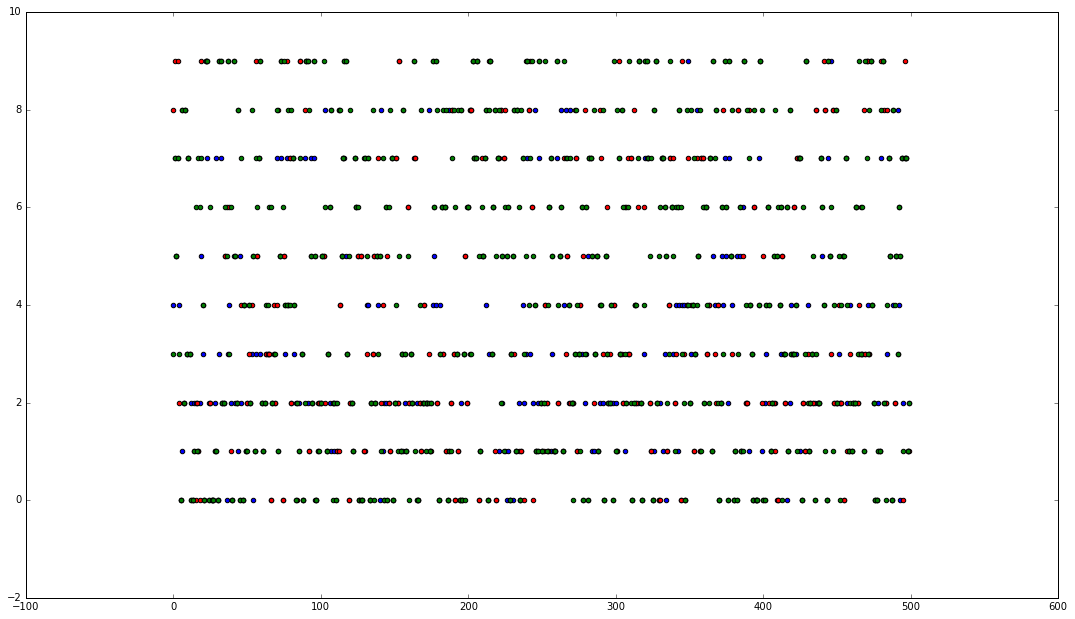

In [118]:
x = range(len(test_predictions1))
y = test_predictions1

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.scatter(x,y)

x = range(len(test_predictions2))
y = test_predictions2
plt.scatter(x,y,c='r')

x = range(len(test_predictions3))
y = test_predictions3
plt.scatter(x,y,c='g')

plt.show()

In [215]:
# #We save your predictions to file
test_p_file = open('test_predictions_bad2.csv','w')
test_p_file.write('ImageName,Prediction\n')
for i,image in enumerate(testimages):
    test_p_file.write(image+','+str(int(newPredictions[i]))+'\n')
test_p_file.close()

Your predictions have been saved to a file called 'test_predictions.csv'. You can upload this through the Kaggle interface to make your submission.
<p><h3>Want to do better?</h3>
In order to get the best performance, you will  need to tune the parameters of SIFT, of the bag-of-words (number of clusters), and of your classifier.
<br>
<br>
If you think that you've exhausted these parameters but still want to perform better, you can look at a number of things:
<ul>
<li>What if I use other distance functions in my knn classifiers? Look e.g. at: the histogram intersection distance or Manhattan distance online.</li>
<li>Other classifiers: You are allowed to use other classifiers from sklearn (e.g. SVMs, Random Forests, AdaBoost, ...). You will need to figure out how these functions work and how to set the parameters (using the validation images). You should also be prepared to provide the motivation for any decisions in your report.</li>
<li>What about better bag-of-words representations (e.g. VLAD or Fisher Vector)?</li>
<li>What about deep networks?</li>
<li>Your own weird idea. If you have some idea in your head, try it out! We welcome those ideas. They do not even have to give a  performance boost, as long as you can explain the reasons behind your idea.</li>
</ul>